## Imports

In [1]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install tensorflow --upgrade

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import sklearn
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim
from gensim.models import Word2Vec

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

## Loading Data

In [3]:
#main data
df_fr = pd.read_csv('fr_dataset.csv')
df_ar = pd.read_csv('ar_dataset.csv')

#assest data(positive tweets)
df_fr2 = pd.read_csv('french_tweets.csv')
df_ar2 = pd.read_excel("arr.xlsx")

## Exploring data

#### French Dataset

###### 1) Main dataset

In [4]:
df_fr.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,origin,other
1,2,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,other,individual
2,3,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,other,women
3,4,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,other,other
4,5,eh les renois faut se réveiller la @url,normal,direct,sadness,origin,african_descent


In [5]:
df_fr.describe()

,HITId
count,4014.000000
mean,2007.500000
std,1158.886319
min,1.000000
25%,1004.250000
50%,2007.500000
75%,3010.750000
max,4014.000000


In [6]:
print('Size of the dataset:')
len(df_fr)

Size of the dataset:


4014

In [7]:
#test if the data contains null values
print('Nan value',df_fr.isnull().sum())

Nan value HITId                  0
tweet                  0
sentiment              0
directness             0
annotator_sentiment    0
target                 0
group                  0
dtype: int64


In [8]:
#take a look at the column of the dataframe to see the features
df_fr.columns

Index(['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment',
       'target', 'group'],
      dtype='object')

In [9]:
df_fr['sentiment'].value_counts()

offensive                                          1336
normal                                              821
abusive                                             594
fearful                                             236
hateful                                             207
                                                   ... 
abusive_hateful_disrespectful_normal                  1
fearful_disrespectful_hateful_normal                  1
fearful_abusive_offensive_hateful_disrespectful       1
fearful_offensive_disrespectful_hateful_normal        1
disrespectful_hateful                                 1
Name: sentiment, Length: 69, dtype: int64

<AxesSubplot:xlabel='HITId', ylabel='target'>

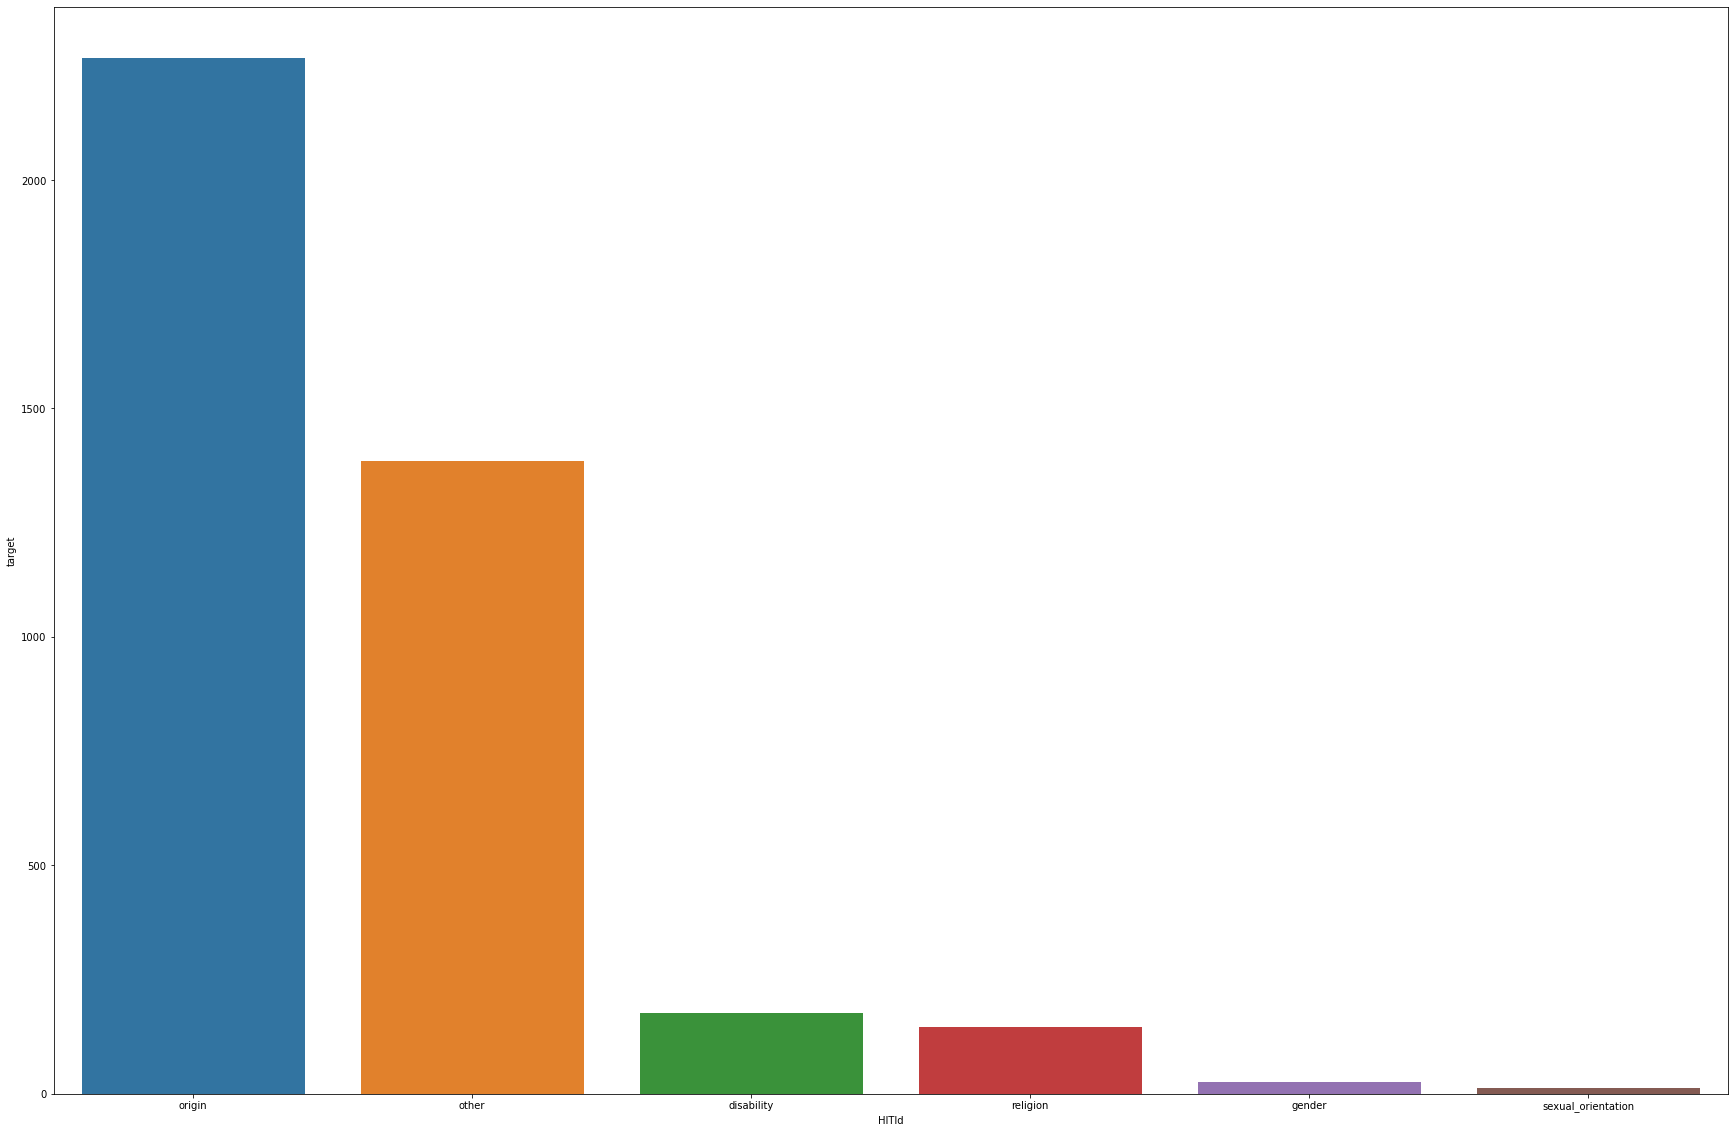

In [10]:
#### Class distribution 
cum = df_fr['target'].value_counts().to_frame()
cum['HITId'] = cum.index
cumfig, ax = plt.subplots(figsize=(30,20))
sns.barplot(data=cum,x='HITId',y='target',ax=ax)

###### 2) Assest dataset

In [11]:
df_fr2.head()

,label,text
0,0,"- Awww, c'est un bummer. Tu devrais avoir davi..."
1,0,Est contrarié qu'il ne puisse pas mettre à jou...
2,0,J'ai plongé plusieurs fois pour la balle. A ré...
3,0,Tout mon corps a des démangeaisons et comme si...
4,0,"Non, il ne se comporte pas du tout. je suis en..."


In [12]:
print('Size of the dataset:')
len(df_fr2)

Size of the dataset:


1526724

In [13]:
#test if the data contains null values
print('Nan value',df_fr2.isnull().sum())

Nan value label    0
text     0
dtype: int64


###### Note : 
in this dataset we don't have as much features as in the previous one!

#### Arabic dataset

###### 1) Main dataset

In [14]:
df_ar.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,gender,individual
1,2,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,other,other
2,3,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,other,individual
3,4,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,origin,other
4,5,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,origin,other


In [15]:
df_ar.describe()

,HITId
count,3353.000000
mean,1677.000000
std,968.072053
min,1.000000
25%,839.000000
50%,1677.000000
75%,2515.000000
max,3353.000000


In [16]:
print('Size of the dataset:')
len(df_ar)

Size of the dataset:


3353

In [17]:
#test if the data contains null values
print('Nan value',df_ar.isnull().sum())

Nan value HITId                  0
tweet                  0
sentiment              0
directness             0
annotator_sentiment    0
target                 0
group                  0
dtype: int64


In [18]:
df_ar['sentiment'].value_counts()

offensive                                          950
normal                                             915
hateful                                            460
abusive_disrespectful                              205
abusive_hateful                                    168
disrespectful                                      167
disrespectful_normal                               103
abusive_normal                                      81
abusive_offensive                                   77
hateful_disrespectful                               40
offensive_disrespectful                             32
abusive_offensive_hateful_disrespectful_normal      23
offensive_normal                                    21
abusive                                             19
hateful_normal                                      15
fearful                                             12
offensive_hateful                                   11
abusive_offensive_disrespectful_hateful_normal      10
fearful_ab

<AxesSubplot:xlabel='HITId', ylabel='target'>

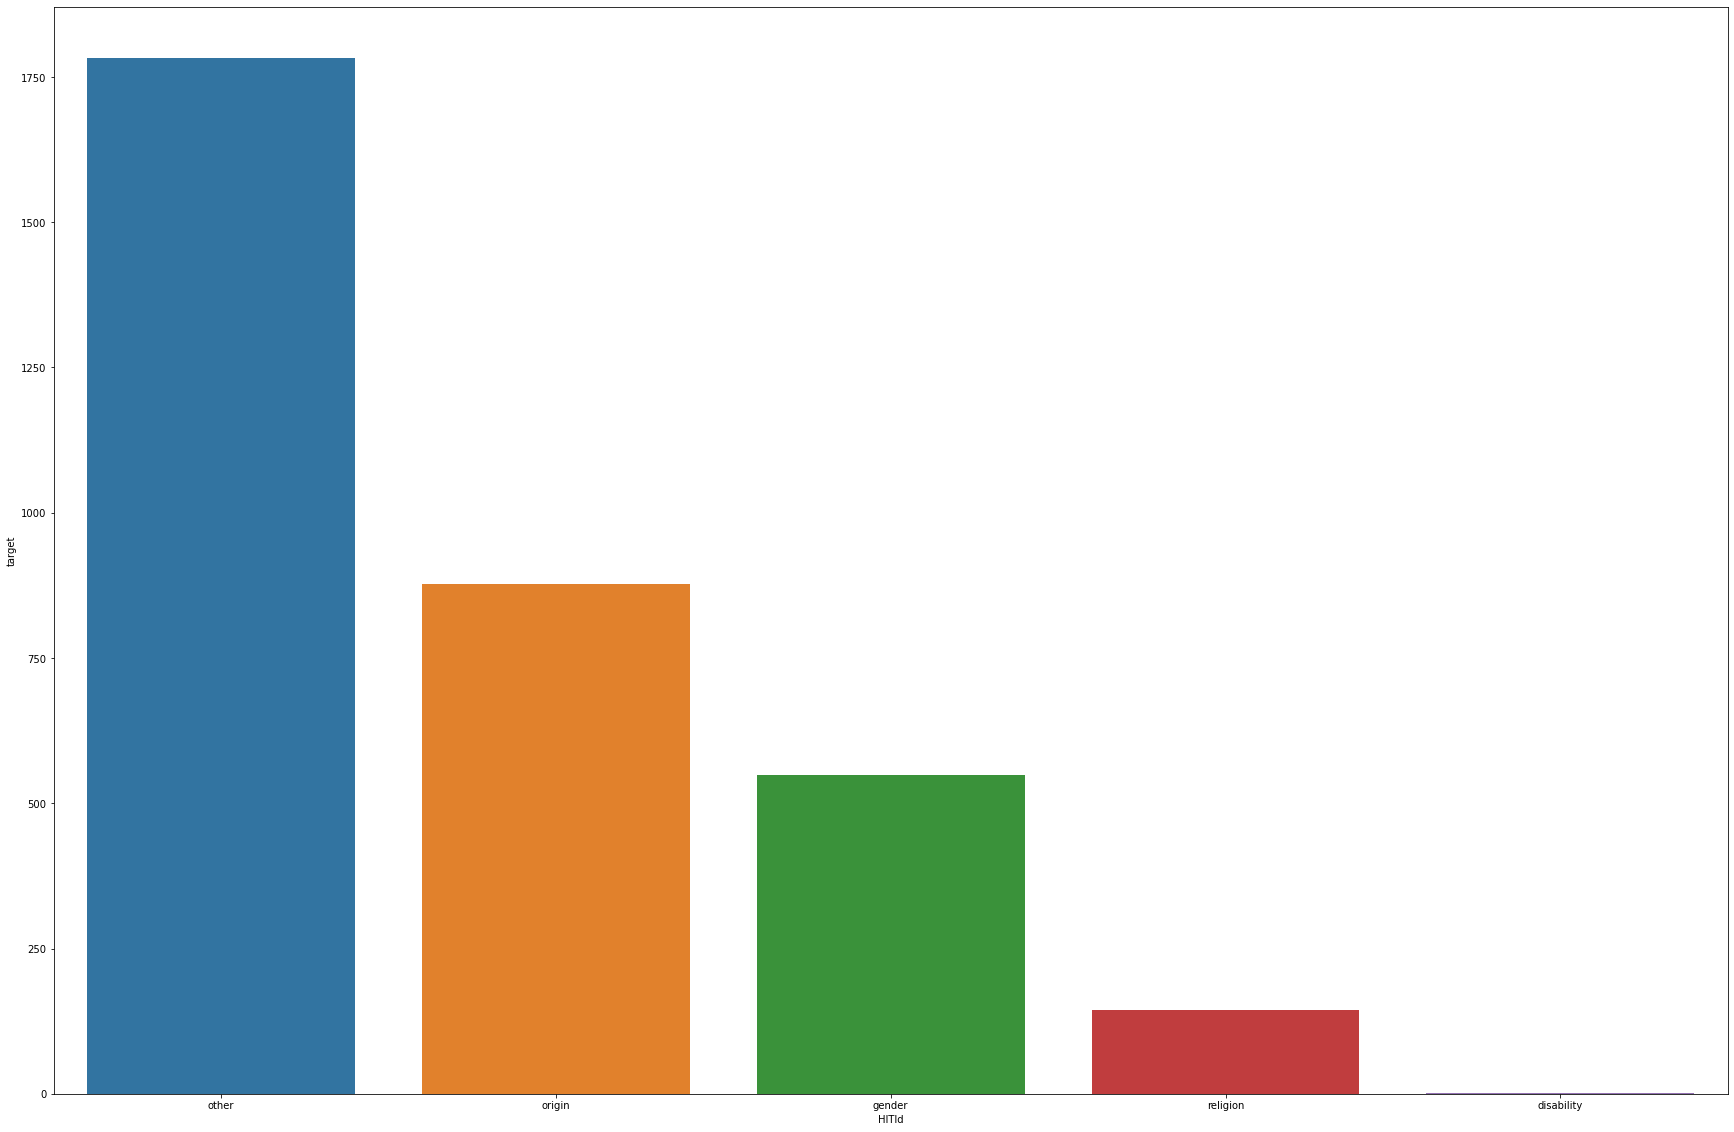

In [19]:
#### Class distribution 
cum = df_ar['target'].value_counts().to_frame()
cum['HITId'] = cum.index
cumfig, ax = plt.subplots(figsize=(30,20))
sns.barplot(data=cum,x='HITId',y='target',ax=ax)

###### 2) Assest dataset

In [20]:
df_ar2.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [21]:
print('Size of the dataset:')
len(df_ar2)

Size of the dataset:


1800

In [22]:
#test if the data contains null values
print('Nan value',df_ar2.isnull().sum())

Nan value ID           0
Feed         0
Sentiment    0
dtype: int64


## Data processing

Since our task is a binary classification: negative or positive tweet, we will create a dataset that contains both negative and positive tweet. To do this, we will merge the previous dataset with the assest one that contains positive tweets. 

While merging, the assest doesn't contain the columns : HTDID, sentiment, directness, annotator_sentiment and group,some NaN values appeared. To avoid them these values will be replaced in each column with an appripriate value, for instance:


sentiment-> 'normal', 

directness->'direct',

groupe-> 'nothing' and 

annotator_sentiment->'indifference'

#### French Dataset

In [23]:
# negative tweets contained
# we put target = 0 negative
neg = df_fr.loc[df_fr['target']!='normal','target'] = 0
neg = df_fr
neg

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,0,other
1,2,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,0,individual
2,3,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,0,women
3,4,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,0,other
4,5,eh les renois faut se réveiller la @url,normal,direct,sadness,0,african_descent
...,...,...,...,...,...,...,...
4009,4010,@user tres bien. le cinema francais c...est so...,offensive,indirect,sadness,0,left_wing_people
4010,4011,@user j’ai que des rebeus en demande d’amis aussi,disrespectful_normal,direct,indifference,0,arabs
4011,4012,@user sale juif de merde,offensive,direct,fear_shock_indifference_sadness_disgust,0,jews
4012,4013,@user pourquoi tant de migrants africains en e...,normal,indirect,indifference,0,immigrants


In [24]:
#positive tweets contained in the assest dataset
pos = df_fr2.loc[df_fr2['label']==1]
#since we have a several amount of data, we take a part of it
n = len(pos)
pos= pos[0:int(n/100)]
len(pos)
pos= pos.rename(columns={'label':'target','text':'tweet'})

In [25]:
# merging the two dataframes
data_fr = pd.concat([neg,pos], ignore_index=True, sort=False)
#print(len(data_fr))
data_fr

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1.0,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,0,other
1,2.0,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,0,individual
2,3.0,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,0,women
3,4.0,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,0,other
4,5.0,eh les renois faut se réveiller la @url,normal,direct,sadness,0,african_descent
...,...,...,...,...,...,...,...
11560,NaN,"À l'époque, c'était plus $. Mais probablement ...",NaN,NaN,NaN,1,NaN
11561,NaN,"Elle habite à Denver, mais elle arrive dans un...",NaN,NaN,NaN,1,NaN
11562,NaN,"Fraises fraîches, mûres et un biscuit au poule...",NaN,NaN,NaN,1,NaN
11563,NaN,Finis presque tout ... alors je ne peux pas at...,NaN,NaN,NaN,1,NaN


In [26]:
# fixing nan values
data_fr.loc[data_fr['sentiment'].isnull().values==True,'sentiment'] = 'normal'
data_fr.loc[data_fr['directness'].isnull().values==True,'directness'] = 'direct'
data_fr.loc[data_fr['group'].isnull().values==True,'group'] = 'nothing'
data_fr.loc[data_fr['annotator_sentiment'].isnull().values==True,'annotator_sentiment'] = 'indifference'
data_fr = sklearn.utils.shuffle(data_fr)

In [27]:
data_fr.drop(columns='HITId')

,tweet,sentiment,directness,annotator_sentiment,target,group
8908,"Finalement, j'ai dormi la nuit dernière.",normal,direct,indifference,1,nothing
4748,"Faites-moi savoir ce que vous pensez, j'ai une...",normal,direct,indifference,1,nothing
10797,bonjour tweeple,normal,direct,indifference,1,nothing
1241,@user @user @user @user mais espece d'autiste ...,offensive,direct,shock,0,individual
118,- grèce : augmentation du nombre d’enfants réf...,disrespectful,direct,sadness,0,immigrants
...,...,...,...,...,...,...
863,je fais partie de l’élite des rebeus,offensive,direct,shock,0,other
3447,@user @user tiens encore cette théorie du comp...,normal,indirect,sadness,0,jews
3186,c’est fantastique d’avoir des renois dans une ...,fearful,direct,shock,0,individual
2568,@user @user non. tuer ce qu...on veut. quelle ...,fearful_abusive_hateful_disrespectful_normal,indirect,sadness,0,other


<AxesSubplot:xlabel='tweet', ylabel='target'>

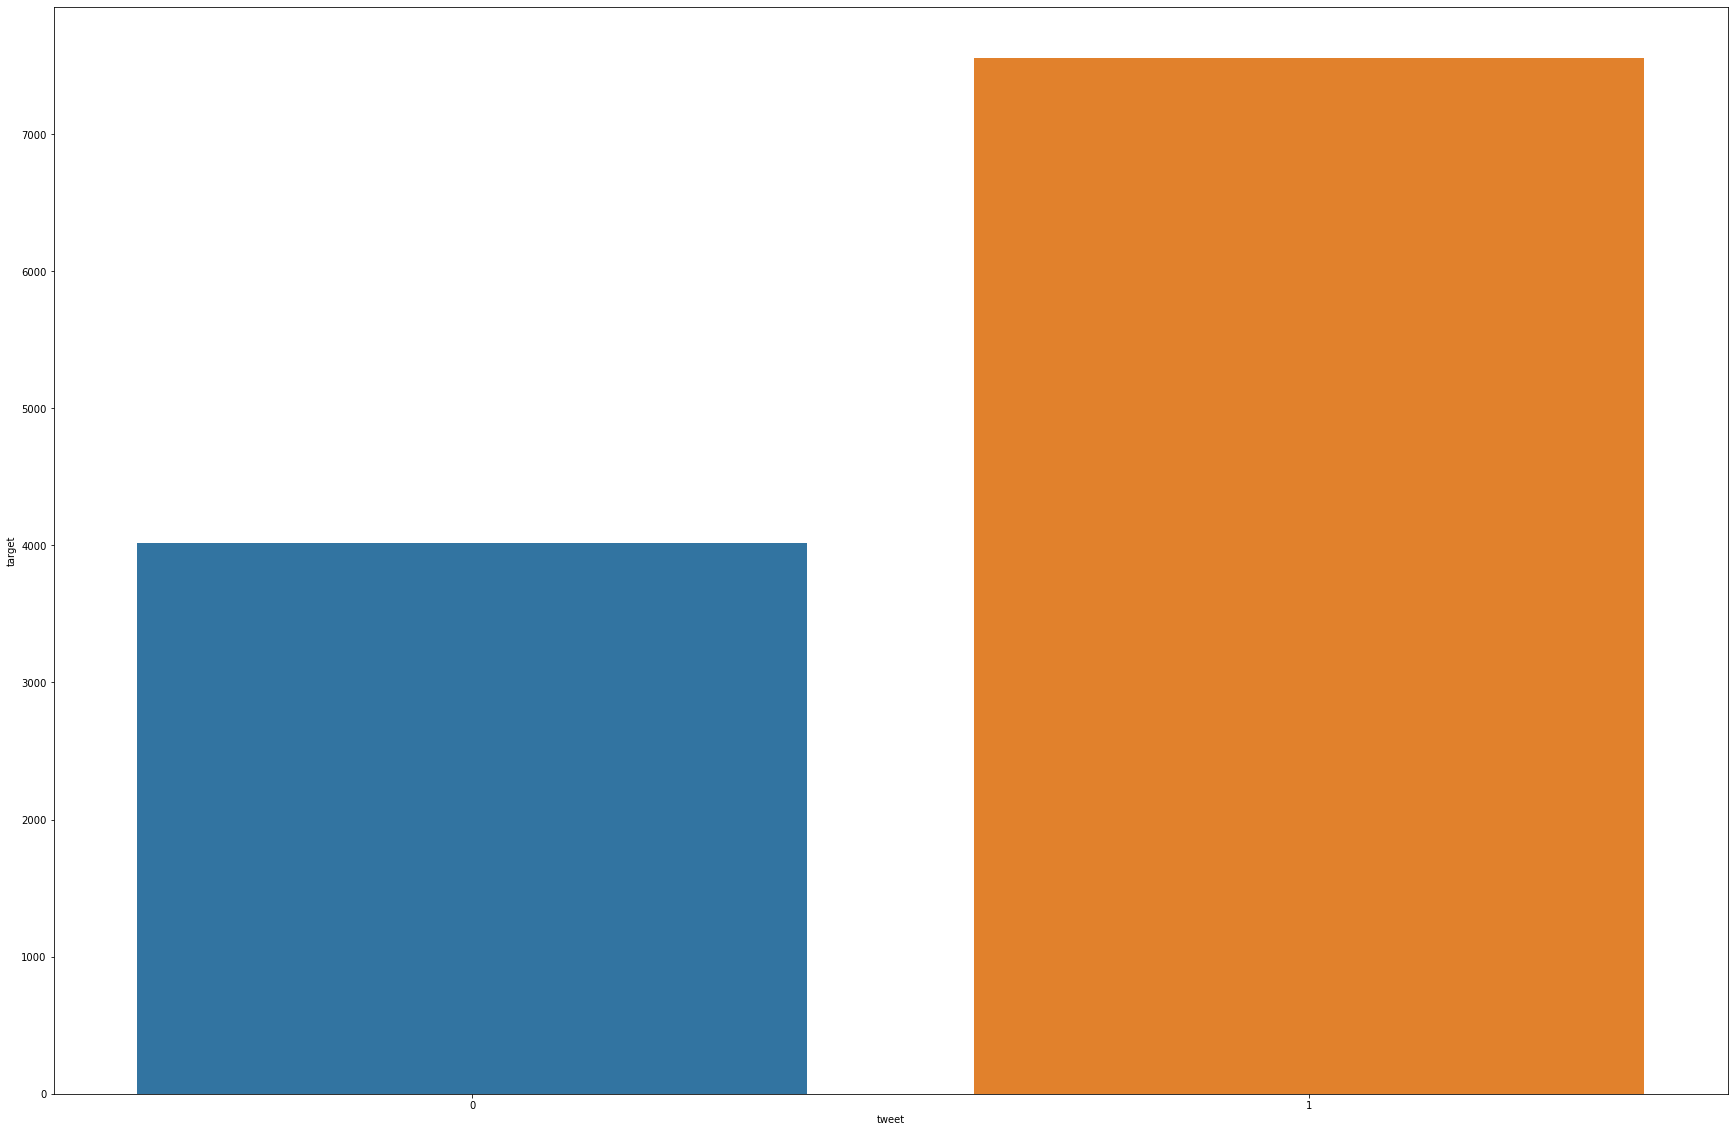

In [28]:
# distribution of classes: 0,1
cum = data_fr['target'].value_counts().to_frame()
cum['tweet'] = cum.index
cumfig, ax = plt.subplots(figsize=(30,20))
sns.barplot(data=cum,x='tweet',y='target',ax=ax)

#### Arabic dataset

In [29]:
neg = df_ar.loc[df_ar['target']!='normal','target'] = 0
neg = df_ar
neg

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,0,individual
1,2,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,0,other
2,3,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,0,individual
3,4,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,0,other
4,5,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,0,other
...,...,...,...,...,...,...,...
3348,3349,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...,disrespectful_normal,direct,sadness,0,other
3349,3350,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...,hateful,indirect,anger_indifference,0,other
3350,3351,الكلب لا يعض اذن اخوه كذابين خنازير @url,offensive_hateful,indirect,disgust,0,other
3351,3352,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...,hateful,indirect,shock,0,other


In [30]:
#positive tweets contained in the assest dataset
df_ar2.loc[df_ar2['Sentiment']=='Positive']
df_ar2.loc[df_ar2['Sentiment']=='Positive','Sentiment'] = 1
pos = df_ar2.loc[df_ar2["Sentiment"]==1]
pos= pos.rename(columns={'Sentiment':'target','Feed':'tweet'})
pos = pos.drop(columns={'ID'})

In [31]:
pos

,tweet,target
0,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,1
2,كله رائع بجد ربنا يكرمك,1
5,ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا,1
8,اتحزن فان الله يدافع عنك والملائكه تستغفر لك و...,1
9,اترك ما تهوى لاجل من تخشى,1
...,...,...
1777,يعتبر الترمس من المصادر الطبيعيه لفتح الشهيه و...,1
1778,يعطيك العافيه,1
1797,يمتاز الاردن بتنوع السياحه فيه فتنقسم السياحه ...,1
1798,ينور عليك ويكثر من امثالك,1


In [32]:
# merging the two dataframes
data_ar = pd.concat([neg,pos], ignore_index=True, sort=False)
#print(len(data_ar))
data_ar

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1.0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,0,individual
1,2.0,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,0,other
2,3.0,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,0,individual
3,4.0,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,0,other
4,5.0,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,0,other
...,...,...,...,...,...,...,...
4248,NaN,يعتبر الترمس من المصادر الطبيعيه لفتح الشهيه و...,NaN,NaN,NaN,1,NaN
4249,NaN,يعطيك العافيه,NaN,NaN,NaN,1,NaN
4250,NaN,يمتاز الاردن بتنوع السياحه فيه فتنقسم السياحه ...,NaN,NaN,NaN,1,NaN
4251,NaN,ينور عليك ويكثر من امثالك,NaN,NaN,NaN,1,NaN


In [33]:
data_ar.loc[data_ar['sentiment'].isnull().values==True,'sentiment'] = 'normal'
data_ar.loc[data_ar['directness'].isnull().values==True,'directness'] = 'direct'
data_ar.loc[data_ar['group'].isnull().values==True,'group'] = 'nothing'
data_ar.loc[data_ar['annotator_sentiment'].isnull().values==True,'annotator_sentiment'] = 'indifference'
data_ar = sklearn.utils.shuffle(data_ar)
data_ar.drop(columns='HITId')

,tweet,sentiment,directness,annotator_sentiment,target,group
3011,البلد طاهر لا يمثلة سافره متبرجة خرجت على دستو...,offensive,indirect,anger_indifference,0,individual
3417,الاهم نكون صادقين مع نفسنا لنكون صادقين مع الا...,normal,direct,indifference,1,nothing
4100,من اسرار النجاح المتواصل والثبات على القمه: ال...,normal,direct,indifference,1,nothing
493,عادة شلح الكندرة قبل دخول بيتك او بيت اي حد لا...,normal,indirect,indifference,0,other
1977,ياريت اربع سنين بنقول الكلام ومفيش حد سامع الس...,abusive_hateful,indirect,anger_indifference,0,other
...,...,...,...,...,...,...
2167,انتوا الحريم تحبون المشاكل الله يجيرنا منكم,offensive,direct,anger_confusion_sadness_indifference_disgust,0,women
4201,يا سلام على الوفاء اللي اتفقد في عصرنا ويا حسر...,normal,direct,indifference,1,nothing
2790,التحرش كثقافة، كأغنية او فيلم او سكيتش كوميدي ...,offensive,indirect,indifference,0,other
1500,اصحى الظاهر بول البعير خالصة مدته @url,normal,indirect,indifference,0,other


<AxesSubplot:xlabel='tweet', ylabel='target'>

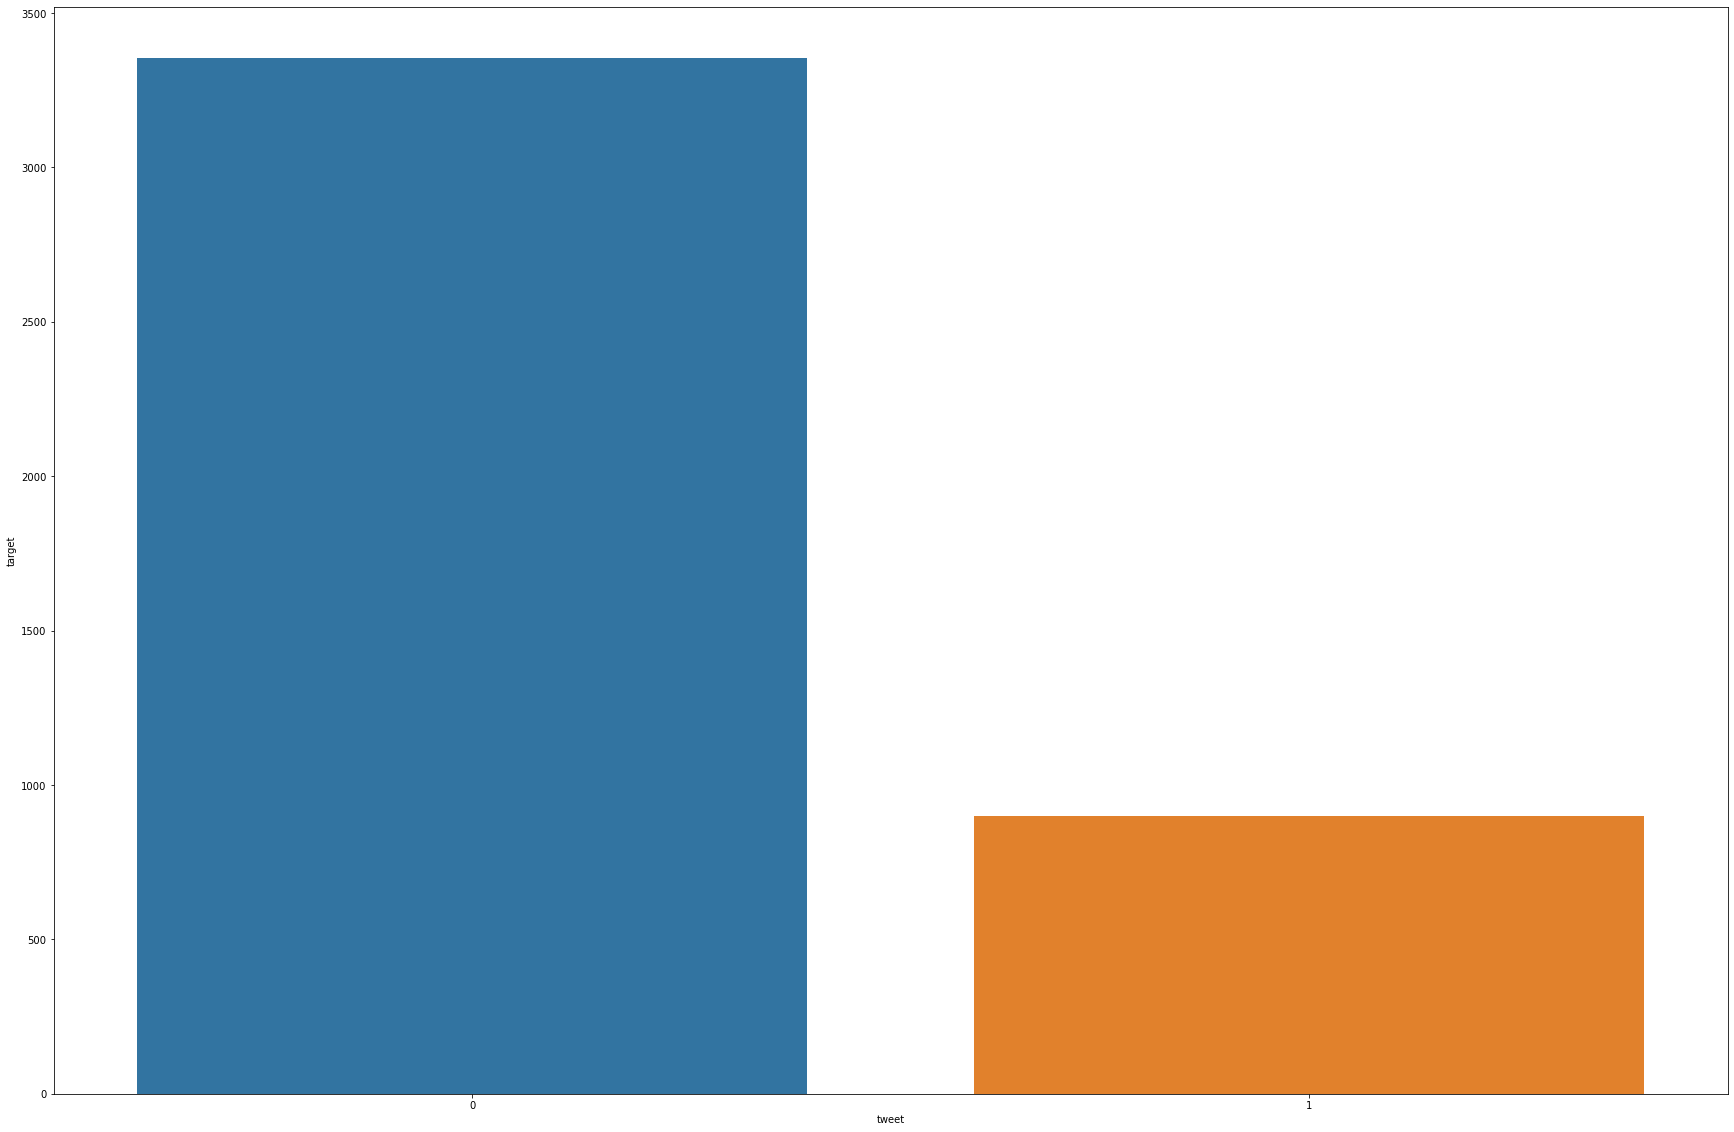

In [34]:
# distribution of classes: 0,1
cum = data_ar['target'].value_counts().to_frame()
cum['tweet'] = cum.index
cumfig, ax = plt.subplots(figsize=(30,20))
sns.barplot(data=cum,x='tweet',y='target',ax=ax)

### Note : 
with this merging, I got more negative tweets than positive ones
(I should search for another dataset)

## ML 

### French Dataset

In [35]:
stop_words = stopwords.words('french')
stemmer = SnowballStemmer("french")

In [36]:
stemmer.stem('information')
stemmer.stem('fleuriste')

'fleurist'

In [102]:
data_fr.tweet[123]

'@user eh bin tu restes à oran!!! sale arabe que tu es'

In [124]:
#Prpro of the tweets:
# we remove @user, links,....
# remove suffixes, prefixes,...
link = r"((http:// )[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
user = "@[^\s]*"
others = "[^a-zA-Z0-9à-úÀ-Ú]"

def prepro(text, stem=False):
    text = re.sub(link, ' ', str(text).lower()).strip() #remove "extra text"
    text = re.sub(user, ' ', str(text).lower()).strip() #remove "extra text"
    text = re.sub(others, ' ', str(text).lower()).strip() #remove "extra text"    

    tokens = []
    for token in text.split(): #for each unit 
        if token not in stop_words: #if we are not at the end 
            if stem:
                tokens.append(stemmer.stem(token)) #keeping only the stem
            else:
                tokens.append(token)
    return " ".join(tokens)


In [125]:
data_fr.tweet = data_fr.tweet.apply(lambda t: prepro(t))

In [126]:
from collections import defaultdict
word_freq = defaultdict(int)
for tweet in data_fr.tweet:
    word_freq[tweet] += 1
len(word_freq)

11361

In [127]:
sorted(word_freq, key=word_freq.get, reverse=True)[:5]


['mongol',
 'remercie',
 'www youtube com titomi15 vérifiez vidéos commentaires présentations amp suivez encouragez x',
 'bonne nuit',
 '']

In [129]:
df_fr_train, df_fr_test = train_test_split(data_fr, test_size=0.15)
print("TRAIN size:", len(df_fr_train))
print("TEST size:", len(df_fr_test))

TRAIN size: 9830
TEST size: 1735


In [130]:
mat = [_text.split() for _text in df_fr_train.tweet] 

In [131]:
len(mat)

9830

##### Word2Vec

In [132]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     workers=2)

In [133]:
w2v_model.build_vocab(mat)

In [134]:
words = w2v_model.wv.index_to_key
len(words)

614

In [135]:
w2v_model.train(mat, total_examples=len(mat), epochs=30)

(1036052, 2344020)

In [137]:
w2v_model.wv.most_similar("mongol")

[('attardé', 0.8387717604637146),
 ('importe', 0.7228904962539673),
 ('mal', 0.7097216844558716),
 ('ferme', 0.7011563777923584),
 ('gros', 0.6937347650527954),
 ('putain', 0.6908676624298096),
 ('con', 0.6813499331474304),
 ('raciste', 0.6810596585273743),
 ('attarde', 0.6778791546821594),
 ('dirait', 0.6746594309806824)]

###### Tokenizing

In [138]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_fr_train.tweet)

In [139]:
len(tokenizer.word_index)

16090

In [140]:
tokenizer.word_index

{'a': 1,
 'plus': 2,
 'mongol': 3,
 'bien': 4,
 'ça': 5,
 'si': 6,
 'gauchiste': 7,
 'faire': 8,
 'attardé': 9,
 'être': 10,
 'tout': 11,
 'fait': 12,
 'comme': 13,
 'merci': 14,
 'maintenant': 15,
 'renois': 16,
 'aime': 17,
 'aussi': 18,
 'oui': 19,
 'aujourd': 20,
 'hui': 21,
 'sale': 22,
 'bon': 23,
 'bonne': 24,
 'va': 25,
 'juste': 26,
 'twitter': 27,
 'vraiment': 28,
 'lol': 29,
 'peut': 30,
 'vais': 31,
 'rebeus': 32,
 'quand': 33,
 'jour': 34,
 'temps': 35,
 'alors': 36,
 'tous': 37,
 'avoir': 38,
 'cette': 39,
 'nuit': 40,
 'journée': 41,
 'très': 42,
 'beaucoup': 43,
 'encore': 44,
 'dire': 45,
 'peux': 46,
 'voir': 47,
 'cela': 48,
 'toujours': 49,
 'peu': 50,
 'arabe': 51,
 '2': 52,
 'migrants': 53,
 'pense': 54,
 'trop': 55,
 'matin': 56,
 'aller': 57,
 'monde': 58,
 'chose': 59,
 'comment': 60,
 'autre': 61,
 'là': 62,
 'travail': 63,
 'ici': 64,
 'non': 65,
 'tellement': 66,
 'haha': 67,
 'espère': 68,
 'oh': 69,
 'contre': 70,
 'fois': 71,
 'amp': 72,
 'quot': 73,
 'di

In [141]:
x_fr_train = pad_sequences(tokenizer.texts_to_sequences(df_fr_train.tweet))

In [142]:
x_fr_train.shape

(9830, 43)

In [143]:
x_fr_test = pad_sequences(tokenizer.texts_to_sequences(df_fr_test.tweet))

In [144]:
x_fr_test.shape

(1735, 19)

##### Label Encoder

In [145]:
labels = df_fr_train.target.unique().tolist()
labels

[1, 0]

In [146]:
encoder = LabelEncoder()
encoder.fit(df_fr_train.target.tolist())

LabelEncoder()

In [152]:
y_fr_train = encoder.transform(df_fr_train.target.tolist())
y_fr_test = encoder.transform(df_fr_test.target.tolist())
y_fr_train = y_fr_train.reshape(-1,1)
y_fr_test = y_fr_test.reshape(-1,1)

In [153]:
print("x_train", x_fr_train.shape)
print("y_train", y_fr_train.shape)
print()
print("x_test", x_fr_test.shape)
print("y_test", y_fr_test.shape)

x_train (9830, 43)
y_train (9830, 1)

x_test (1735, 19)
y_test (1735, 1)


In [158]:
len(tokenizer.word_index.items())

16090

In [161]:
len( w2v_model.wv)

614